In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from random import random, randint

In [25]:
u = lambda x: x * 1.5
f = lambda x: x ** 2
g = lambda x: x ** 3
h = lambda x: x ** 4
e = lambda x: np.exp(x)

x_vals = np.linspace(1,9)

## Object Oriented Usage Style

**Explicitly create Figures using the class hierachy**

* Figure: main object
    * Artists: members of Figure
        * Axe: "Koordinatenkreuz" 
            * Axis (2+): "Achsen des Koordinatenkreuz"
        * Labels
        * Legends
        * ...

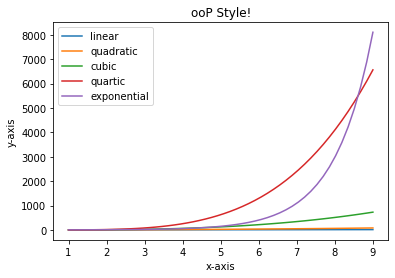

In [26]:
# creates a figure with an attached axe
fig, ax = plt.subplots()  # ooP style still uses plt for instantiaion


# plot pairs of np.array on axe
ax.plot(
    x_vals,     
    u(x_vals),
    label = "linear"
)  

ax.plot(
    x_vals,     
    f(x_vals),
    label = "quadratic"
)  

ax.plot(
    x_vals,     
    g(x_vals),
    label="cubic"
    )

ax.plot(
    x_vals,     
    h(x_vals),
    label="quartic"
    )

ax.plot(
    x_vals,     
    e(x_vals),
    label="exponential"
    )



# set additional properties
ax.set_xlabel("x-axis")  # label x axis (of axe obj)
ax.set_ylabel("y-axis")  #  ...  y ...

ax.set_title("ooP Style!")
ax.legend()

## Pyplot-Usage Style

pyplot module automatically creates and manages figures and axes

*plt acts as a universal interface*

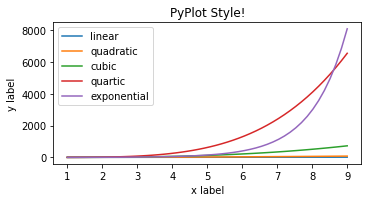

In [27]:
plt.figure(figsize=(5, 2.7), layout="constrained")

# plot on axe
plt.plot(x_vals, u(x_vals), label="linear")
plt.plot(x_vals, f(x_vals), label="quadratic")
plt.plot(x_vals, g(x_vals), label="cubic")
plt.plot(x_vals, h(x_vals), label="quartic")
plt.plot(x_vals, e(x_vals), label="exponential")

# configure artists
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("PyPlot Style!")
plt.legend()


## Multiple Axes in one Figure

suggested Helper Template function using unpacked hash table: 

```python
def template_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out
```

In [42]:
# simple implementation
def my_plotter(ax, data1, data2, plabel=None):
    ax.plot(data1, data2, label=plabel)

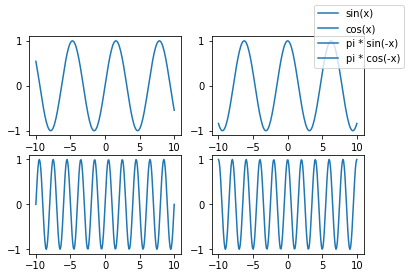

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2)

x = np.linspace(-10,10,200)

my_plotter(axes[0,0], x, np.sin(x), "sin(x)")
my_plotter(axes[0,1], x, np.cos(x), "cos(x)")
my_plotter(axes[1,0], x, np.sin(np.pi * x), "pi * sin(-x)")
my_plotter(axes[1,1], x, np.cos(np.pi * x), "pi * cos(-x)")

fig.legend()


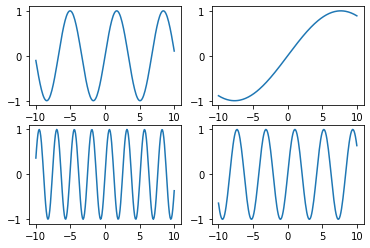

In [57]:
# multiple axes, verbose style
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

x = np.linspace(-10,10,200)

my_plotter(ax1, x, np.sin(random() * np.pi * x))
my_plotter(ax2, x, np.sin(random() * np.e * x))
my_plotter(ax3, x, np.sin(random() * np.pi * x))
my_plotter(ax4, x, np.sin(random() * np.e * x))



## FuncAnimation - Create Animations from plots

In [58]:
from matplotlib.animation import FuncAnimation

In [61]:
def gauss(x, m, s):
    return (
        (s * np.sqrt(2 * np.pi)) * np.exp(
            (-0.5) * (((x - m) ** 2) / s ** 2) 
        )
    )

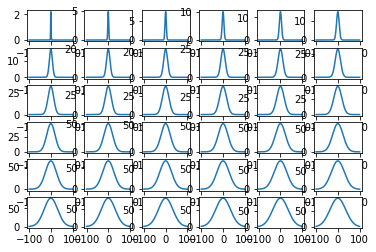

In [69]:
fig, axes = plt.subplots(nrows=6, ncols=6)

x = np.linspace(-100,100,200)
mean = 0
std = 1

for row in axes:
    for ax in row:
        ax.plot(x, gauss(x,mean, std), label=f"s={std}")
        std += 1

#fig.legend()